In [60]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.pyplot import figure

%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

palette = [ '#0085C7',"#FFCE54", '#000000','#00BFC4','#F8766D','#A1469E']
sns.set_palette(palette)

In [61]:
movies = pd.read_csv(r'N:\IBA\6th Sem\Business Analytics\Project\Individual Project\movies.csv')

In [62]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894.0,NaN,Romance,45,USA,None,Alexander Black,...,6.2,97.0,6.0,35.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,12/26/1906,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,6.1,425.0,6.2,50.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911.0,8/19/1911,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,5.9,146.0,5.7,15.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912.0,11/13/1912,"Drama, History",100,USA,English,Charles L. Gaskill,...,5.1,299.0,5.9,39.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911.0,3/6/1911,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,1607.0,7.2,215.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [63]:
print(movies.columns)

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'rating', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics', 'males_allages_avg_vote',
       'males_allages_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'top1000_voters_rating',
       'top1000_voters_votes', 'us_voters_rating', 'us_voters_votes',
       'non_us_voters_rating', 'non_us_voters_votes'],
      dtype='object')


In [64]:
# 25th Percentile
def q25(x):
    return x.quantile(0.25)

# 75th Percentile
def q75(x):
    return x.quantile(0.75)

percetile_25_r = q25(movies['rating'])
percetile_75_r = q75(movies['rating'])
mean_r = movies['rating'].mean()
median_r = movies['rating'].median()

c:\users\kennw\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


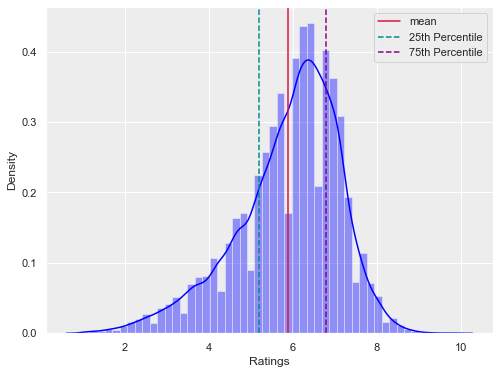

In [65]:
sns.distplot(movies.rating, color = 'blue').set(xlabel= 'Ratings')

plt.axvline(mean_r, 0,1, color = '#DC143C' , label = 'mean')
plt.axvline(percetile_25_r, 0,1, color = '#008B8B' , linestyle="--", label = '25th Percentile')
plt.axvline(percetile_75_r, 0,1, color = '#8B008B', linestyle="--", label = '75th Percentile')

plt.legend(loc='upper right')

plt.savefig('Rating_Variable', dpi = 300)

In [66]:
print(mean_r)
print(median_r)
print(percetile_25_r)
print(percetile_75_r)

5.8986558732747065
6.1
5.2
6.8


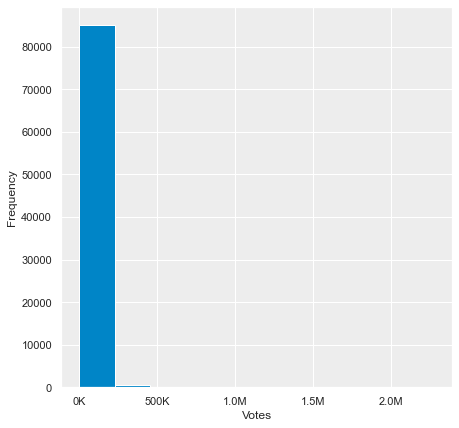

In [67]:
def format_number(data_value, indx):
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter 

fig, ax = plt.subplots(figsize = (7,7))
plt.hist(movies.votes)
ax.xaxis.set_major_formatter(format_number)

plt.xlabel('Votes')
plt.ylabel('Frequency')

plt.savefig('Votes_Dist_Raw', dpi = 300)

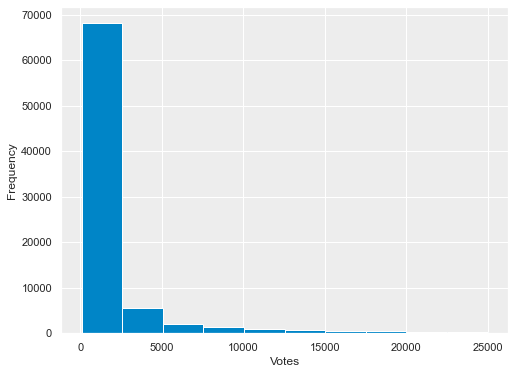

In [68]:
most_movies = movies.loc[movies['votes'] <= 25000]

plt.hist(most_movies.votes)
plt.xlabel('Votes')
plt.ylabel('Frequency')

plt.savefig('Votes_Dist_Focused', dpi = 300)

In [69]:
percetile_25_v = q25(movies['votes'])
percetile_75_v = q75(movies['votes'])
mean_v = movies['votes'].mean()
median_v = movies['votes'].median()

print(mean_v)
print(median_v)
print(percetile_25_v)
print(percetile_75_v)


9493.489604565837
484.0
205.0
1766.5


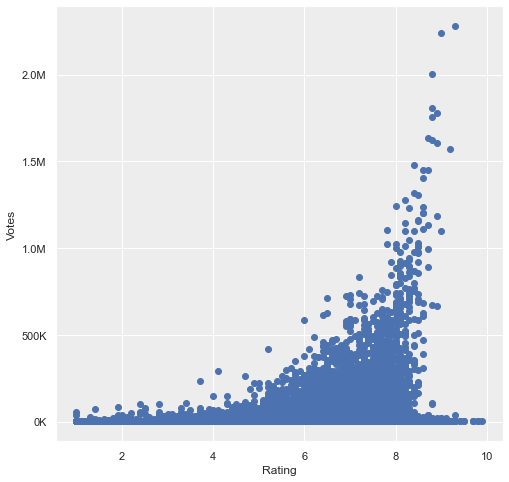

In [97]:
fig, ax = plt.subplots(figsize = (8,8))

plt.scatter(movies.rating, movies.votes)
ax.yaxis.set_major_formatter(format_number)
plt.xlabel('Rating')
plt.ylabel('Votes')


plt.savefig('Rating_vs_Votes', dpi = 300)

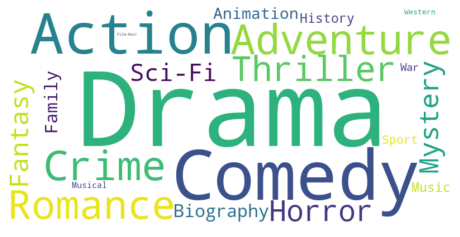

In [71]:
movies_2 = movies.copy()
movies_2.dropna(inplace=True)

from collections import defaultdict
all_genres = defaultdict(int)

for genres in movies_2['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Genre_Word_Cloud', dpi = 300)

In [72]:
def count_genres(df):
    amount_of_genres = []
    df['genre'] = df['genre'].astype(str)
    for genre in df['genre']:
        if genre != 'NaN':
            count = len(genre.split(','))
            amount_of_genres.append(count)
        else:
            amount_of_genres.append(-1)
    return amount_of_genres

movies['Number_Genres'] = count_genres(movies)

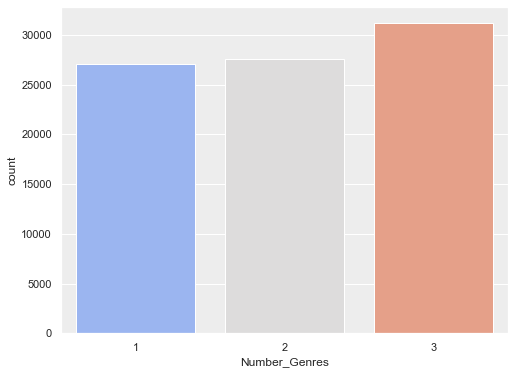

In [73]:
sns.countplot(x="Number_Genres", data=movies, palette="coolwarm")
plt.savefig('Number_Genres', dpi = 300)

In [74]:
movies.Number_Genres.value_counts()

3    31232
2    27548
1    27075
Name: Number_Genres, dtype: int64

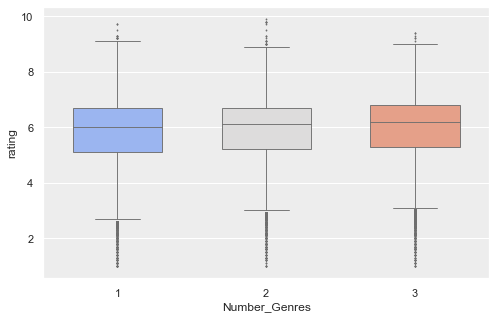

In [75]:
fig, ax = plt.subplots(figsize = (8,5))
ax = sns.boxplot(x="Number_Genres", y="rating", data=movies, palette = 'coolwarm', width=0.6, fliersize=1, linewidth=0.9)

plt.savefig('Number_Genres_Rating', dpi = 300)

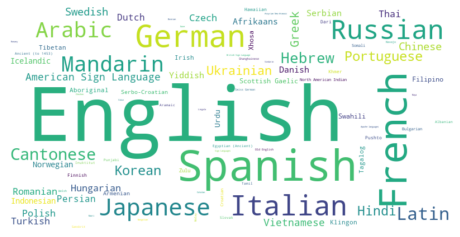

In [82]:
movies_3 = movies.copy()
movies_3.dropna(inplace=True)

from collections import defaultdict
all_languages = defaultdict(int)

for languages in movies_3['language']:
    for language in languages.split(','):
        all_languages[language.strip()] += 1

from wordcloud import WordCloud

languages_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(all_languages)
plt.imshow(languages_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Language_Word_Cloud', dpi = 300)

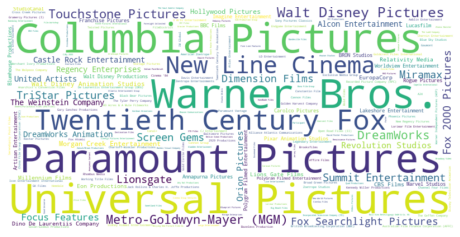

In [77]:
movies_4 = movies.copy()
movies_4.dropna(inplace=True)

from collections import defaultdict
all_production_companies = defaultdict(int)

for production_companies in movies_4['production_company']:
    for production_company in production_companies.split(','):
        all_production_companies[production_company.strip()] += 1

from wordcloud import WordCloud

production_companies_cloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(all_production_companies)
plt.imshow(production_companies_cloud, interpolation='bilinear')
plt.axis('off')

plt.savefig('Production_Company_Word_Cloud', dpi = 300)

In [78]:
dummies = pd.get_dummies(movies['genre'].str.get_dummies(sep=','))

In [79]:
matrix = np.asmatrix(dummies.corr())
G = nx.from_numpy_matrix(matrix)

In [80]:
def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,8), dpi=100)

    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.GnBu 
    else: edge_colour = plt.cm.PuRd
        
    nx.draw_networkx_edges(H, positions, edgelist= None,style='dashed',
                          width= weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')

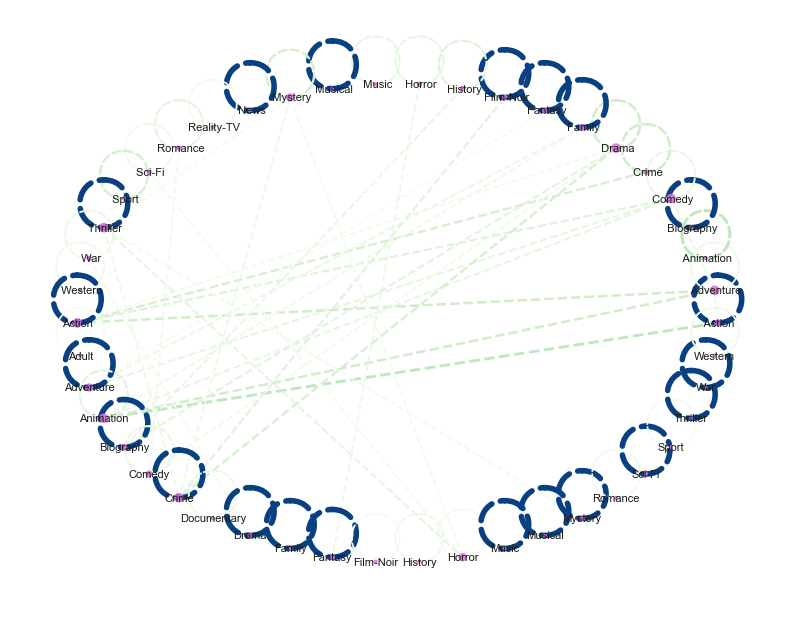

In [81]:
sns.set_style("darkgrid", {"axes.facecolor": "1"})

corr = dummies.corr() 
stocks = corr.index.values 
csr_matrix = np.asmatrix(corr) 
G = nx.from_numpy_matrix(csr_matrix) 
G = nx.relabel_nodes(G,lambda x: stocks[x]) 
G.edges(data=True) 
create_corr_network(G, 'positive', 0.1)
plt.savefig('Genre_Network', dpi = 300)

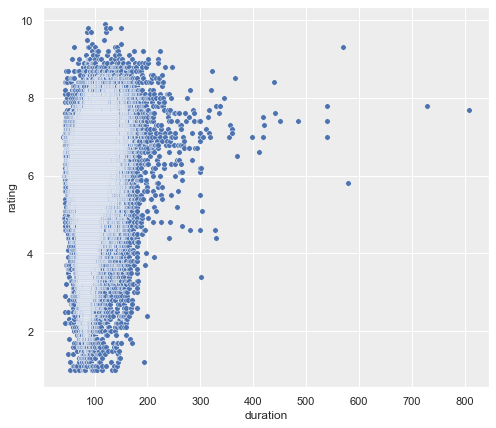

In [85]:
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(8,7)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

know_duration = movies[movies['duration']!='Unknown']
know_duration['duration'] = know_duration['duration'].astype(int)

sns.scatterplot(x="duration", y="rating",data=know_duration.sort_values('duration'), s=30)

plt.savefig('Duration_VS_Rating', dpi = 300)


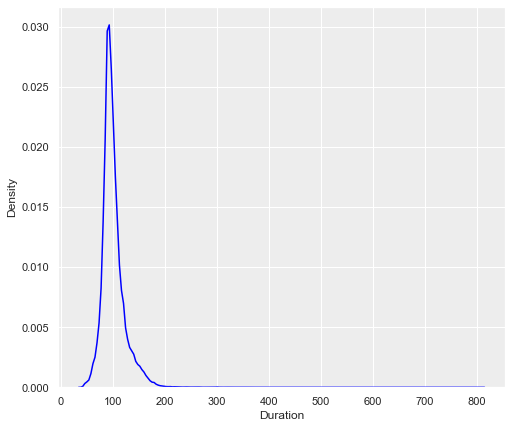

In [86]:
sns.kdeplot(x="duration", data=know_duration.sort_values('duration'), color = 'blue', clip=(0.0, 2000))

plt.xlabel('Duration')

plt.savefig('Duration_Distribution', dpi = 300)

In [89]:
know_duration.sort_values('duration').duration.max()

808

In [90]:
know_duration.sort_values('duration').duration.mean()

100.35141808863781

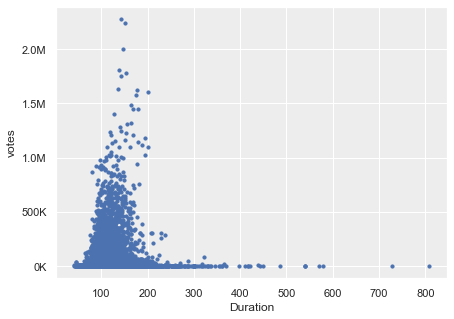

In [96]:
fig, ax = plt.subplots(figsize = (7,5))
plt.scatter(x="duration", y="votes",data=know_duration.sort_values('duration'), s=10)
plt.xlabel('Duration')
plt.ylabel('votes')
ax.yaxis.set_major_formatter(format_number)

plt.savefig('Duration_VS_Votes', dpi = 300)
